In [1]:
import pandas as pd
import random

df=pd.read_csv("D:\CSE315\Algerian_forest_Modm - Algerian_forest_Modm.csv")

samp = df.sample(n=180, random_state=5976)
samp.to_csv("D:\CSE315\Algerian_forest_Modm - Algerian_forest_Modm.csv")
samp

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
101,151,42,156,11,9,2012,30,73,14,0.0,79.2,6.5,16.6,2.1,6.6,1.2,not_fire,2
38,90,168,76,5,8,2012,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,fire,1
13,165,102,98,19,7,2012,35,59,17,0.0,88.1,12.0,52.8,7.7,18.2,10.9,fire,1
28,84,36,142,25,7,2012,39,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,not_fire,2
132,152,88,6,15,9,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,not_fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,140,71,171,12,9,2012,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,fire,2
8,45,133,58,8,8,2012,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,2.6,not_fire,1
51,63,126,90,25,6,2012,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,fire,1
164,37,96,198,4,7,2012,34,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9,fire,2


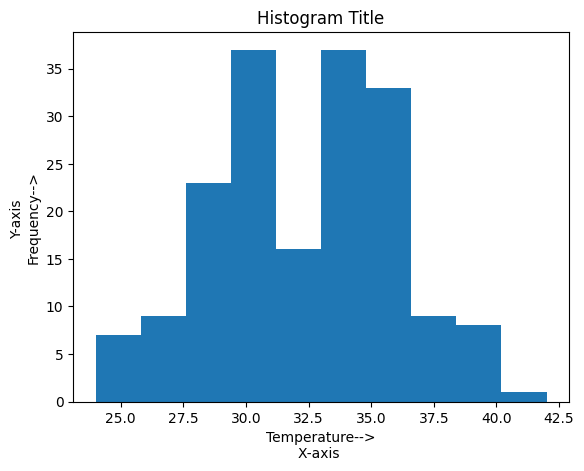

Multimodal: Multiple distinct peaks


In [2]:

#  ************ Q-b **********
import pandas as pd
import matplotlib.pyplot as plt
pdata=pd.read_csv("D:\CSE315\Algerian_forest_Modm - Algerian_forest_Modm.csv")
myData = pdata["Temperature"]

plt.hist(myData)
plt.xlabel('Temperature-->\nX-axis ')
plt.ylabel('Y-axis \nFrequency-->')
plt.title('Histogram Title')
plt.show()

import numpy as np

def check_distribution_shape(data, bins = 20 ):
    # Calculate histogram
    hist, bin_edges = np.histogram(data, bins=bins)

    # Find number of peaks
    num_peaks = len(np.where(np.diff(np.sign(np.diff(hist))) < 0)[0]) + 1

    # Check for unimodal, bimodal, or multimodal distribution
    if num_peaks == 1:
        return "Unimodal: A single peak"
    elif num_peaks == 2:
        return "Bimodal: Two peaks with multiple similar modes "
    else:
        return "Multimodal: Multiple distinct peaks"

print(check_distribution_shape(myData))






In [3]:


#  ************ Q-c **********
from scipy import stats
import statistics as st

# Sample temperature data
temperature_data = pdata['Temperature']

# Calculate mean
mean = np.mean(temperature_data)

# Calculate median
median = np.median(temperature_data)

# Calculate mode
mode_result = stats.mode(temperature_data)
mode_count = mode_result.count  # Get the count of the mode
mode_values = mode_result.mode    # Get the mode value(s)

# Calculate geometric mean
geo_mean = st.geometric_mean(temperature_data)

# Calculate harmonic mean
harmonic_mean = st.harmonic_mean(temperature_data)

# Comment on skewness
skewness = stats.skew(temperature_data)

# Define skewness strength based on absolute value
skew_strength = "weak" if abs(skewness) < 0.5 else "moderate" if abs(skewness) <= 1 else "strong"

# Determine skewness direction
skew_direction = "negatively" if skewness < 0 else "positively" if skewness > 0 else "symmetric"

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode_values, "(count:", mode_count, ")")
print("Geometric Mean:", geo_mean)
print("Harmonic Mean:", harmonic_mean)
print("Skewness:", "{:.4f}".format(skewness), "The distribution is", skew_strength, skew_direction, "skewed.")



Mean: 32.28888888888889
Median: 32.0
Mode: 31 (count: 21 )
Geometric Mean: 32.09076090666916
Harmonic Mean: 31.88904244103298
Skewness: -0.0420 The distribution is weak negatively skewed.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


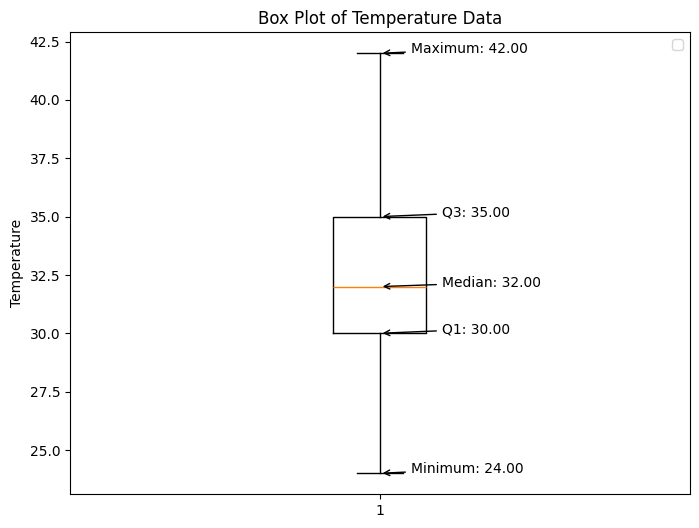

Five Summary Measures:
Minimum: 24
1st Quartile: 30.0
Median: 32.0
3rd Quartile: 35.0
Maximum: 42

Mild Outliers: []
Wild Outliers: []


In [4]:
#  ************ Q-d **********
import numpy as np
import matplotlib.pyplot as plt

# Sample temperature data
temperature_data = pdata['Temperature']

# Calculate summary measures
minimum = np.min(temperature_data)
first_quartile = np.percentile(temperature_data, 25)
median = np.median(temperature_data)
third_quartile = np.percentile(temperature_data, 75)
maximum = np.max(temperature_data)

# Calculate interquartile range (IQR)
iqr = third_quartile - first_quartile

# Define mild and wild outlier thresholds
mild_threshold = 1.5 * iqr
wild_threshold = 3.0 * iqr

# Detect outliers
outliers = []
mild_outliers = []
wild_outliers = []

for temp in temperature_data:
    if temp < first_quartile - mild_threshold or temp > third_quartile + mild_threshold:
        mild_outliers.append(temp)
    elif temp < first_quartile - wild_threshold or temp > third_quartile + wild_threshold:
        wild_outliers.append(temp)

# Construct a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(temperature_data, whis=[0, 100])  # Set whiskers to extend to minimum and maximum values
plt.title('Box Plot of Temperature Data')
plt.ylabel('Temperature')

# Include mild and wild outliers in the plot
if mild_outliers:
    plt.scatter(np.ones_like(mild_outliers), mild_outliers, color='orange', label='Mild Outliers')
if wild_outliers:
    plt.scatter(np.ones_like(wild_outliers), wild_outliers, color='red', label='Wild Outliers')

# Add annotations for median, minimum, maximum, and IQR
plt.annotate('Median: {:.2f}'.format(median), xy=(1, median), xytext=(1.10, median), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Minimum: {:.2f}'.format(minimum), xy=(1, minimum), xytext=(1.05, minimum), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Maximum: {:.2f}'.format(maximum), xy=(1, maximum), xytext=(1.05, maximum), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Q1: {:.2f}'.format(first_quartile), xy=(1, first_quartile), xytext=(1.10, first_quartile), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Q3: {:.2f}'.format(third_quartile), xy=(1, third_quartile), xytext=(1.10, third_quartile), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.show()

print("Five Summary Measures:")
print("Minimum:", minimum)
print("1st Quartile:", first_quartile)
print("Median:", median)
print("3rd Quartile:", third_quartile)
print("Maximum:", maximum)

print("\nMild Outliers:", mild_outliers)
print("Wild Outliers:", wild_outliers)


In [5]:
#**************Q-e**************
import numpy as np

# Sample temperature data
temperature_data = pdata['Temperature']

# Calculate population standard deviation
population_std = np.std(temperature_data, ddof=0)

# Calculate population mean
population_mean = np.mean(temperature_data)

# Calculate population coefficient of variation
population_cv = (population_std / population_mean) * 100  # expressed as a percentage

print("Population Standard Deviation:", "{:.4f}".format(population_std))
print("Population Coefficient of Variation:","{:.4f}".format( population_cv), "%")

# Interpretation
if population_cv < 15:
    print("The dataset has low relative variability.")
elif 15 <= population_cv <= 25:
    print("The dataset has moderate relative variability.")
else:
    print("The dataset has high relative variability.")

Population Standard Deviation: 3.5473
Population Coefficient of Variation: 10.9861 %
The dataset has low relative variability.


In [6]:


#*************Q-f*************

from scipy.stats import skew, kurtosis

# Sample temperature data
temperature_data = pdata['Temperature']

# Calculate coefficient of skewness
skewness = skew(temperature_data)

# Calculate coefficient of kurtosis
kurt = kurtosis(temperature_data)

print("Coefficient of Skewness:", skewness)
print("Coefficient of Kurtosis:", kurt)

# Comment on skewness
if skewness < 0:
    skew_comment = "The distribution is negatively skewed."
elif skewness > 0:
    skew_comment = "The distribution is positively skewed."
else:
    skew_comment = "The distribution is symmetric."

# Comment on kurtosis
if kurt < 3:
    kurt_comment = "The distribution is platykurtic (light tails, flatter peak)."
elif kurt > 3:
    kurt_comment = "The distribution is leptokurtic (heavy tails, sharper peak)."
else:
    kurt_comment = "The distribution has the same kurtosis as a normal distribution."

print("\nSkewness Comment:", skew_comment)
print("Kurtosis Comment:", kurt_comment)

Coefficient of Skewness: -0.04198392735444912
Coefficient of Kurtosis: -0.292333266286386

Skewness Comment: The distribution is negatively skewed.
Kurtosis Comment: The distribution is platykurtic (light tails, flatter peak).


In [7]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Replace df with the actual name of your DataFrame

# Selecting the columns of interest
selected_columns = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
selected_data = pdata[selected_columns]

# Calculating covariance matrix
covariance_matrix = selected_data.cov().round(4)

# Calculating correlation matrix
correlation_matrix = selected_data.corr().round(4)

# Finding inversely related variables from the covariance matrix
inversely_related_variables = []
for column in covariance_matrix.columns:
    for index, value in covariance_matrix[column].items():
        if value < 0:
            if (index, column) not in inversely_related_variables:
                inversely_related_variables.append((column, index))

# Create DataFrames for covariance and correlation matrices
covariance_df = pd.DataFrame(covariance_matrix, columns=covariance_matrix.columns, index=covariance_matrix.index)
correlation_df = pd.DataFrame(correlation_matrix, columns=correlation_matrix.columns, index=correlation_matrix.index)

# Convert inversely related variables to DataFrame
inversely_related_df = pd.DataFrame(inversely_related_variables, columns=['Variable 1', 'Variable 2'])

# Display the DataFrames
print("Covariance Matrix:")
print(covariance_df)
print("\nCorrelation Matrix:")
print(correlation_df)

# Printing highest and lowest correlation coefficients
print("\nHighest correlation coefficient:", format(correlation_matrix.values.max(), '.4f'))
print("Lowest correlation coefficient:", format(correlation_matrix.values.min(), '.4f'))

# Printing inversely related variables
print("\nInversely related variables:")
print(inversely_related_df)


Covariance Matrix:
             Temperature        RH       Ws     Rain      FFMC       DMC  \
Temperature      12.6535  -36.2961  -2.5633  -1.6833   34.4649   18.4375   
RH              -36.2961  222.8101   9.0140   5.4659 -143.2156  -67.9101   
Ws               -2.5633    9.0140   7.6108   0.3684   -4.4807    1.0817   
Rain             -1.6833    5.4659   0.3684   3.5381  -13.4562   -6.1361   
FFMC             34.4649 -143.2156  -4.4807 -13.4562  212.8295  103.8321   
DMC              18.4375  -67.9101   1.0817  -6.1361  103.8321  135.0612   
DC               48.0925 -122.3885  15.0870 -26.5900  339.3955  443.5315   
ISI               9.5092  -43.7115   0.1969  -2.7775   45.6125   33.4768   
BUI              19.4910  -65.2947   2.5346  -7.5222  117.1701  151.8078   
FWI              14.8888  -63.5162   0.9665  -4.6370   74.5172   74.1070   

                    DC      ISI       BUI       FWI  
Temperature    48.0925   9.5092   19.4910   14.8888  
RH           -122.3885 -43.7115  -65

In [8]:
#*****************************Q-h********************
from sklearn.linear_model import LinearRegression

# Extract FWI and RH data
fwi_data = pdata['FWI']
rh_data = pdata['RH']

# Reshape RH data to meet scikit-learn requirements
rh_data_reshaped = rh_data.values.reshape(-1, 1)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(rh_data_reshaped, fwi_data)

# Get the regression coefficient (slope) and intercept
regression_coefficient = model.coef_[0]
intercept = model.intercept_

# Calculate the regression equation in the form y = a + bx
a = intercept
b = regression_coefficient

regression_equation = f"FWI = {a:.2f} + ({b:.2f}) * RH"

print("Regression Equation (in the form y = a + bx):", regression_equation)

print("Regression Coefficient (slope):", regression_coefficient)
print("Intercept:", intercept)

# Estimate the FWI when RH is 21.5%
rh_value = 21.5
estimated_fwi = model.predict([[rh_value]])
print("Estimated FWI when RH is 21.5%:", estimated_fwi[0])









Regression Equation (in the form y = a + bx): FWI = 24.41 + (-0.29) * RH
Regression Coefficient (slope): -0.28506882631697705
Intercept: 24.40506615182742
Estimated FWI when RH is 21.5%: 18.276086386012413


In [9]:

#***************************************  i  *************************************

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np


X = pdata[['FWI', 'RH']]
y = pdata['Classes']

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X, y)

weight_vector = lda_model.coef_[0]
bias_term = lda_model.intercept_[0]


RH_values = [79, 67, 63, 56]
FWI_values = [0.21, 2.5, 10.2, 6.1]

classification_results = []

for FWI, RH in zip(FWI_values, RH_values):
    discriminant_function_value = np.dot(weight_vector, [FWI, RH]) + bias_term

    if discriminant_function_value > 0:
        classification_results.append("Fire")
    else:
        classification_results.append("Not Fire")

for i in range(len(RH_values)):
    print(f"For FWI={FWI_values[i]} and RH={RH_values[i]}, the classification is: {classification_results[i]}")




For FWI=0.21 and RH=79, the classification is: Fire
For FWI=2.5 and RH=67, the classification is: Fire
For FWI=10.2 and RH=63, the classification is: Not Fire
For FWI=6.1 and RH=56, the classification is: Not Fire
